# EDA Анализ: Bird Strikes Dataset
## Цель исследования:
Оценить качество данных о столкновениях птиц с воздушными судами по трем ключевым метрикам:
1. **Completeness** - Полнота данных
2. **Uniqueness** - Уникальность записей  
3. **Outlier Ratio** - Доля выбросов
## Объект исследования:
Датасет содержит информацию об инцидентах столкновений птиц с самолетами за период 2000-2011 годы.
#Информация о датасете

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

FILE_ID = "13FZ-XuVwak49XF5225IGnt5QfMR6fVjo"
FILE_URL = f"https://drive.google.com/uc?id={FILE_ID}"

# Загрузка данных

df = pd.read_csv(FILE_URL)

print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nПервые 5 строк:")
display(df.head())
df.info()

Размер датасета: 65610 строк, 23 столбцов

Первые 5 строк:


C:\Users\Светлана\AppData\Local\Temp\ipykernel_11292\2376196497.py:14: DtypeWarning: Columns (7,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FILE_URL)


,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,227413,No damage,2.0,NORTHWEST AIRLINES,Michigan,Climb,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,NaN,400,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,226578,No damage,2.0,NORTHWEST AIRLINES,Wisconsin,Take-off run,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,268383,Caused damage,1.0,PRIVATELY OWNED,Tennessee,Landing Roll,Large,White-tailed deer,NaN,Day,NaN,NaN,0,0,0,0.0,0,20
3,SACRAMENTO INTL,< 1000 ft,B-737-300,NaN,1/1/2005 0:00,229514,Caused damage,2.0,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,2140.0,Night,Y,NaN,0,"117,135","117,135",NaN,500,142
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,225661,No damage,2.0,UNITED AIRLINES,NaN,Landing Roll,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65610 entries, 0 to 65609
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Airport: Name                               65601 non-null  object 
 1   Altitude bin                                65610 non-null  object 
 2   Aircraft: Make/Model                        65610 non-null  object 
 3   Effect: Impact to flight                    3269 non-null   object 
 4   FlightDate                                  65610 non-null  object 
 5   Record ID                                   65610 non-null  int64  
 6   Effect: Indicated Damage                    65610 non-null  object 
 7   Aircraft: Number of engines?                42766 non-null  object 
 8   Aircraft: Airline/Operator                  65610 non-null  object 
 9   Origin State                                59163 non-null  object 
 10  When: Phas

# Приведение типов данных


Исходный датасет содержит 65,610 записей и 23 признака. Данные до обработки выводятся таблицей при помощи команды:

```
print(raw_data.info())
```

Были проведены следующие преобразования:

1. Преобразованы даты в столбце 'FlightDate'

2. Преобразование числовых колонок

Стоимостные показатели: Cost: Total $, Cost: Repair, Cost: Other

Параметры полета: Speed (IAS) in knots, Feet above ground, Miles from airport

Временные показатели: When: Time (HHMM), Aircraft: Number of engines?

3. Категориальные данные

Effect: Indicated Damage, When: Phase of flight, When: Time of day


In [12]:
df_converted = df.copy()
# Преобразование дат
if 'FlightDate' in df_converted.columns:
    df_converted['FlightDate'] = pd.to_datetime(df_converted['FlightDate'], errors='coerce')

# Числовые значения
cost_cols = ['Cost: Total $', 'Cost: Repair (inflation adj)', 'Cost: Other (inflation adj)']
num_cols = [
    'Speed (IAS) in knots',
    'Feet above ground',
    'Miles from airport',
    'Aircraft: Number of engines?',
    'Cost: Aircraft time out of service (hours)'
]

for col in cost_cols + num_cols:
    if col in df_converted.columns:
        df_converted[col] = pd.to_numeric(df_converted[col], errors='coerce')

# Преобразование категориальных колонок
cat_cols = [
    'Airport: Name',
    'Wildlife: Species',
    'When: Phase of flight',
    'Effect: Indicated Damage',
    'When: Time of day'
]
for col in cat_cols:
    if col in df_converted.columns:
        df_converted[col] = df_converted[col].astype('category')

# Преобразование булевых колонок
if 'Pilot warned of birds or wildlife?' in df_converted.columns:
    df_converted['Pilot warned of birds or wildlife?'] = df_converted['Pilot warned of birds or wildlife?'].map({
        'Yes': True, 'No': False, 'Y': True, 'N': False, 'Unknown': False
    })

print("Типы данных после преобразования:")
print(df_converted.dtypes)

Типы данных после преобразования:
Airport: Name                                       category
Altitude bin                                          object
Aircraft: Make/Model                                  object
Effect: Impact to flight                              object
FlightDate                                    datetime64[ns]
Record ID                                              int64
Effect: Indicated Damage                            category
Aircraft: Number of engines?                         float64
Aircraft: Airline/Operator                            object
Origin State                                          object
When: Phase of flight                               category
Wildlife: Size                                        object
Wildlife: Species                                   category
When: Time (HHMM)                                    float64
When: Time of day                                   category
Pilot warned of birds or wildlife?                 

# Метрика 1: Сompleteness - полнота данных

Сompleteness - полнота данных


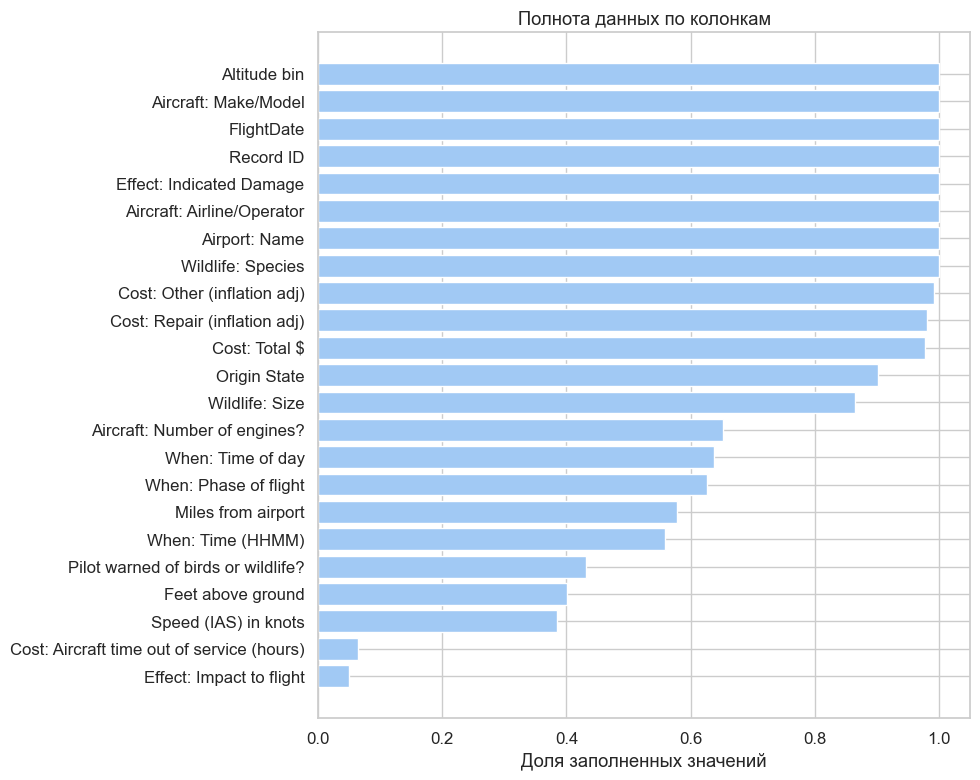

Средняя полнота: 0.743
Колонок с полнотой >90%: 12
Колонок с полнотой <50%: 5


In [13]:
# Метрика 1: Сompleteness - полнота данных
print("Сompleteness - полнота данных")

# Считаем полноту
completeness = 1 - (df_converted.isnull().sum() / len(df))
completeness_df = completeness.reset_index()
completeness_df.columns = ['column', 'completeness']
completeness_df = completeness_df.sort_values('completeness')

# График
plt.figure(figsize=(10, 8))
plt.barh(completeness_df['column'], completeness_df['completeness'])
plt.title("Полнота данных по колонкам")
plt.xlabel("Доля заполненных значений")
plt.tight_layout()
plt.show()

avg_completeness = completeness.mean()
print(f"Средняя полнота: {avg_completeness:.3f}")
print(f"Колонок с полнотой >90%: {(completeness > 0.9).sum()}")
print(f"Колонок с полнотой <50%: {(completeness < 0.5).sum()}")

# Метрика 2: Uniqueness - уникальность

In [16]:
# Метрика 2: Uniqueness - уникальность
print("\nUniqueness - уникальность")

uniqueness_ratio = df_converted.drop_duplicates().shape[0] / df_converted.shape[0]
print(f"Уникальных строк: {df_converted.drop_duplicates().shape[0]}")
print(f"Общее количество строк: {df_converted.shape[0]}")
print(f"Отношение уникальных строк к общему: {uniqueness_ratio:.4f}")


Uniqueness - уникальность
Уникальных строк: 65610
Общее количество строк: 65610
Отношение уникальных строк к общему: 1.0000


# Метрика 3: Outlier Ratio - выбросы


Outlier Ratio - выбросы
Record ID: выбросов — 6108
When: Time (HHMM): выбросов — 0
Cost: Aircraft time out of service (hours): выбросов — 693
Feet above ground: выбросов — 4222
Speed (IAS) in knots: выбросов — 2443

Всего выбросов: 13466
Всего числовых значений: 158187
Доля выбросов: 0.0851


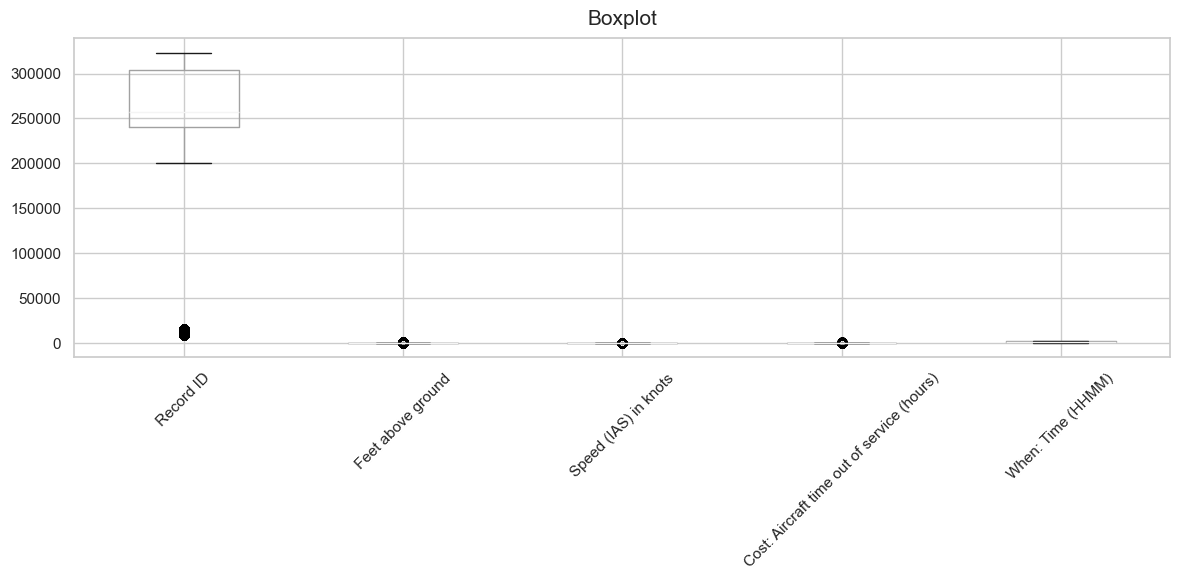

In [21]:
# Метрика 3: Outlier Ratio - выбросы
print("\nOutlier Ratio - выбросы")

# Берем только числовые колонки
numeric_columns = df_converted.select_dtypes(include=[np.number]).columns

total_outliers = 0
total_values = 0
outliers_data = []

for col in numeric_columns:
    # Проверяем что в колонке есть данные
    if df_converted[col].notna().sum() > 0:
        q1 = df_converted[col].quantile(0.25)
        q3 = df_converted[col].quantile(0.75)
        iqr = q3 - q1      
        
        # Если все значения одинаковые, пропускаем
        if iqr == 0:
            continue
            
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница
        
        # Считаем выбросы
        outliers = df_converted[(df_converted[col] < lower_bound) | (df_converted[col] > upper_bound)]
        outlier_count = len(outliers)
        total_values += df_converted[col].notna().sum()
        total_outliers += outlier_count
              
        # Сохраняем для анализа
        outlier_ratio = outlier_count / df_converted[col].notna().sum()
        outliers_data.append({
            'column': col,
            'outliers': outlier_count,
            'outlier_ratio': outlier_ratio,
            'total_values': df_converted[col].notna().sum()
        })
        
        print(f"{col}: выбросов — {outlier_count}")

# Общая статистика
if total_values > 0:
    outlier_ratio = total_outliers / total_values
    print(f"\nВсего выбросов: {total_outliers}")
    print(f"Всего числовых значений: {total_values}")
    print(f"Доля выбросов: {outlier_ratio:.4f}")

# График
outliers_df = pd.DataFrame(outliers_data)
# Берем топ-5 колонок с наибольшим количеством выбросов
top_outlier_cols = outliers_df.nlargest(5, 'outliers')['column'].tolist()

plt.figure(figsize=(12,6))
df_converted[top_outlier_cols].boxplot()
plt.title("Boxplot", fontsize=15, pad=10)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## Выводы по результатам анализа данных

#### 1. Completeness (Полнота данных)
- **Общая полнота: 74.3%**
- **12 колонок** имеют отличную заполненность (>90%)
- **5 колонок** проблемные (<50% заполненности)

#### 2. Uniqueness (Уникальность)
- **100% уникальных записей** 
- **Отсутствуют дубликаты** - данные не содержат повторяющихся строк

#### 3: Outlier Ratio (Выбросы)
- **Общая доля выбросов: 8.51%**
- **13,466 выбросов** из 158,187 числовых значений
- **Record ID**: 6,108 выбросов (закономерно для идентификаторов)

Данные готовы для дальнейшего анализа.

## Анализ частоты столкновений по времени

Этот модуль выполняет исследование сезонности столкновений воздушных судов с птицами 

Основная цель — определить, **в какие месяцы и годы происходит наибольшее количество инцидентов**, что помогает выявить временные закономерности и пики активности

#### Интерпретация графика:
- Более тёплые (красные/оранжевые) цвета указывают на **периоды повышенной частоты столкновений**. 
- Менее насыщенные (жёлтые/светлые) — на **низкую активность**  
- Таким образом, можно определить:
  - **Сезонные пики** (например, весной или осенью — во время миграции птиц)
  - **Тенденции по годам** (рост инцидентов со временем)

#### Используемые инструменты: 
- `seaborn` — построение тепловой карты  
- `matplotlib` — настройка графика и оформление  




Анализ распределения столкновений по месяцам и годам полета


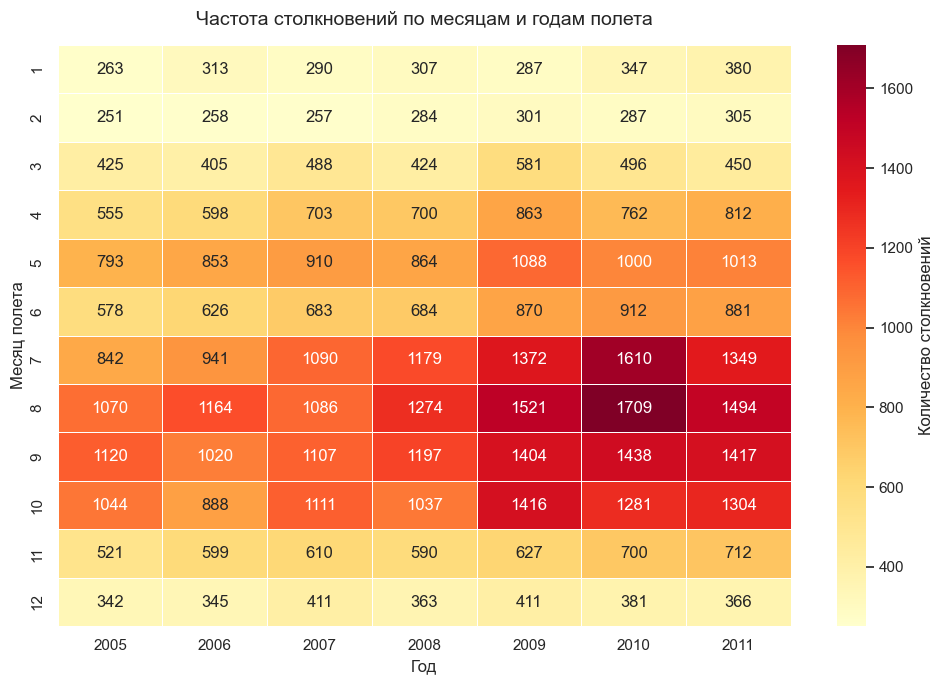

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

#Частота столкновения: распределение по месяцам и годам
print("Анализ распределения столкновений по месяцам и годам полета")

df_converted['Flight Month'] = df_converted['FlightDate'].dt.month
df_converted['Flight Year'] = df_converted['FlightDate'].dt.year

count_time = (
    df_converted
    .groupby(['Flight Month', 'Flight Year'])
    .size()
    .reset_index(name='count')
)

count_time_p = count_time.pivot(index='Flight Month', columns='Flight Year', values='count')

plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")

heat_time = sns.heatmap(
    count_time_p,
    cmap="YlOrRd",
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    cbar_kws={'label': 'Количество столкновений'}
)

heat_time.set_title('Частота столкновений по месяцам и годам полета', fontsize=14, pad=15)
heat_time.set_xlabel('Год', fontsize=12)
heat_time.set_ylabel('Месяц полета', fontsize=12)

plt.tight_layout()
plt.show()


## Анализ количества столкновений по авиакомпаниям

В этом модуле выполняется группировка данных по столбцу Aircraft: Airline/Operator для определения, какие авиакомпании чаще всего сталкивались с птицами

Из данных исключены неизвестные операторы (UNKNOWN), после чего построен бар-график с 10 крупнейшими авиакомпаниями по числу столкновений

Результат позволяет определить авиакомпании с наибольшим количеством зарегистрированных столкновений

Анализ количества столкновений по авиакомпаниям


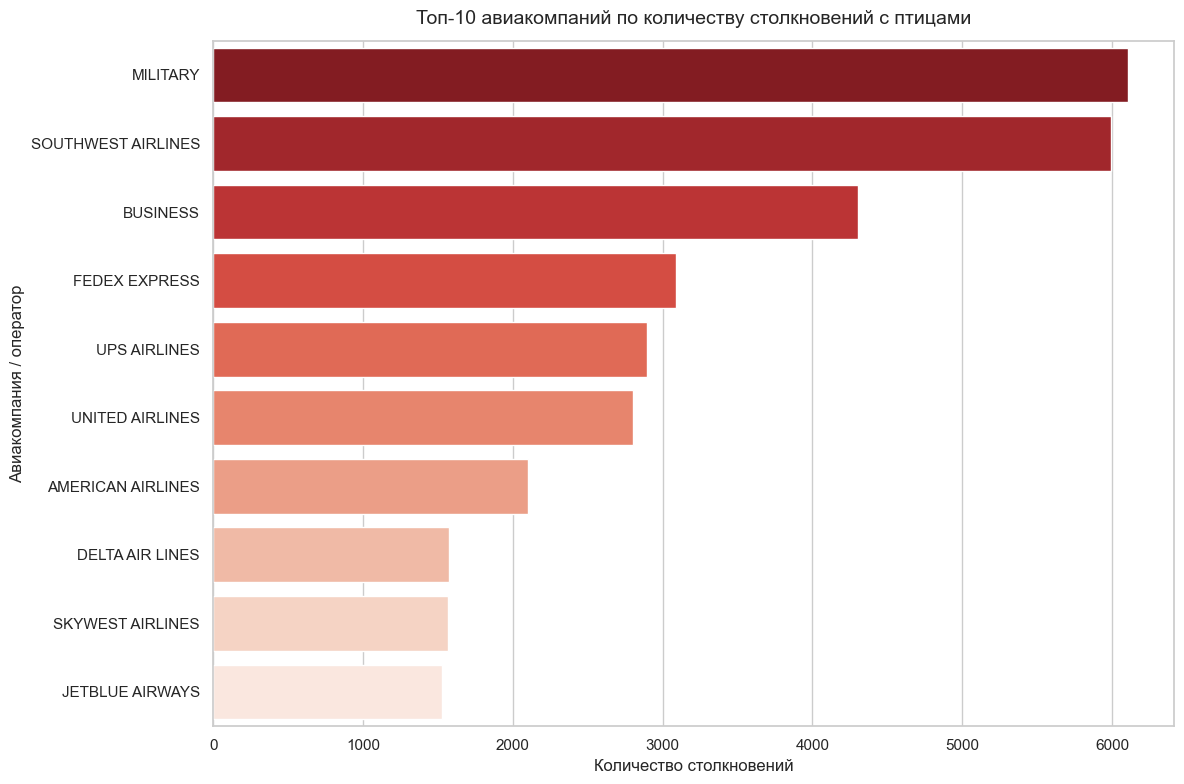

In [46]:
print("Анализ количества столкновений по авиакомпаниям")

airline_strikes = (
    df_converted
    .groupby(['Aircraft: Airline/Operator'])
    .size()
    .to_frame('Количество столкновений')
    .reset_index()
)

airline_strikes = airline_strikes.sort_values('Количество столкновений', ascending=False)
airline_strikes = airline_strikes.loc[airline_strikes['Aircraft: Airline/Operator'] != 'UNKNOWN']
airline_strikes_top10 = airline_strikes.head(10)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

sns.barplot(
    x='Количество столкновений',
    y='Aircraft: Airline/Operator',
    hue='Aircraft: Airline/Operator',
    data=airline_strikes_top10,
    palette='Reds_r',
    legend=False
)

plt.title('Топ-10 авиакомпаний по количеству столкновений с птицами', fontsize=14, pad=12)
plt.xlabel('Количество столкновений', fontsize=12)
plt.ylabel('Авиакомпания / оператор', fontsize=12)
plt.tight_layout()
plt.show()

## Анализ столкновений по фазам полета

Данный модуль показывает распределение столкновений в зависимости от фазы полёта

Используется столбчатая диаграмма (countplot), где каждая колонка отражает частоту столкновений в определенной фазе

Результат помогает выявить наиболее опасные этапы полёта с точки зрения вероятности столкновения с птицами

C:\Users\Светлана\AppData\Local\Temp\ipykernel_11292\791313114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


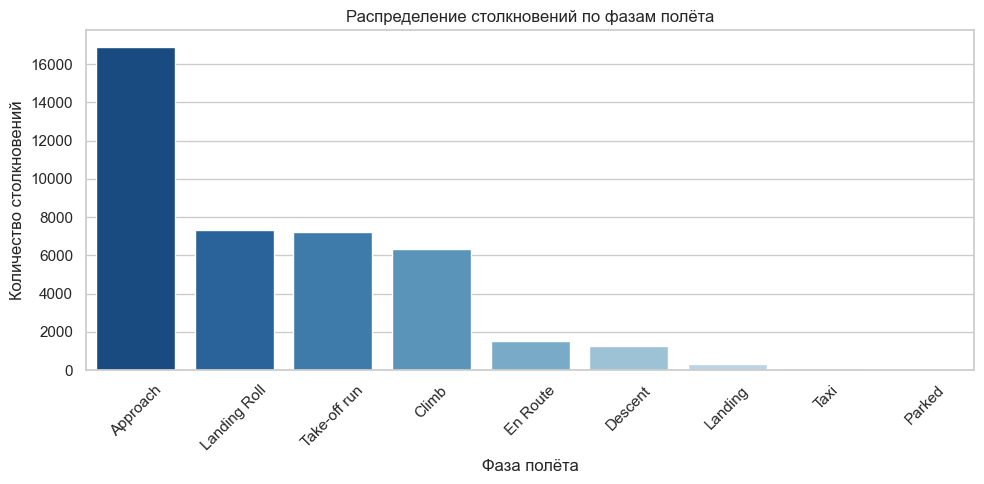

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(
    x='When: Phase of flight',
    data=df_converted,
    order=df_converted['When: Phase of flight'].value_counts().index,
    palette='Blues_r'
)
plt.title('Распределение столкновений по фазам полёта')
plt.xlabel('Фаза полёта') 
plt.ylabel('Количество столкновений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Анализ распределения стоимости ущерба

Этот модуль исследует экономический аспект инцидентов — распределение стоимости ущерба от столкновений

Используется гистограмма (histplot), которая показывает, в каком диапазоне чаще встречаются затраты

Результат позволяет оценить финансовые потери авиакомпаний в результате столкновений

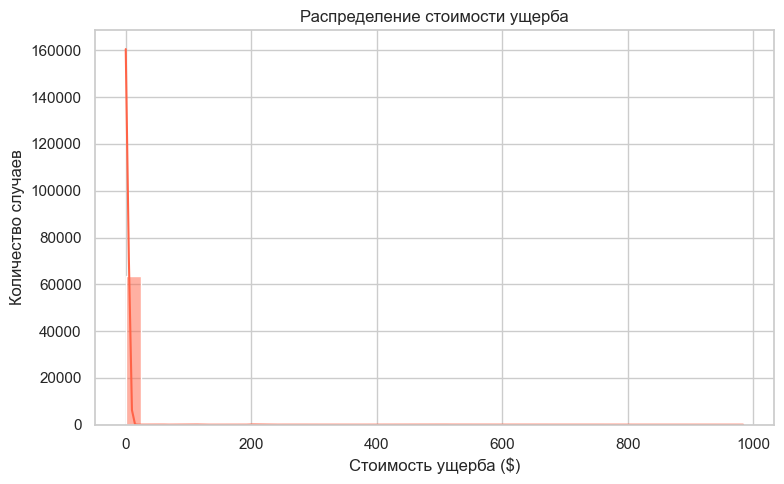

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df_converted,
    x='Cost: Total $',
    bins=40,
    kde=True,
    color='tomato'
)
plt.title('Распределение стоимости ущерба')
plt.xlabel('Стоимость ущерба ($)')
plt.ylabel('Количество случаев')
plt.tight_layout()
plt.show()